In [1]:
from __future__ import division
import csv
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.ticker
get_ipython().magic(u'matplotlib inline')

## Decentralized 

In [53]:
status = 'current'

In [96]:
total_energy_decentralized_m3 = pd.read_csv('result_csv/Decentralized_total_energy_npr_SF_%s.csv'%status)
total_GHG_decentralized_m3 = pd.read_csv('result_csv/Decentralized_total_GHG_npr_SF_%s.csv'%status)
process_energy_decentralized_m3 = pd.read_csv('result_csv/Decentralized_process_energy_npr_SF_%s.csv'%status)
process_GHG_decentralized_m3 = pd.read_csv('result_csv/Decentralized_process_GHG_npr_SF_%s.csv'%status)

In [97]:
process_energy_decentralized_m3['UV operation_'] = process_energy_decentralized_m3['UV operation']
process_energy_decentralized_m3['UV operation'] = 0

In [98]:
process_energy_dec_m3_plot_low=process_energy_decentralized_m3[(process_energy_decentralized_m3['grid_ID']==375)]
process_energy_dec_m3_plot_high=process_energy_decentralized_m3[(process_energy_decentralized_m3['grid_ID']==375)]

energy_plot_dec_first_low=process_energy_dec_m3_plot_low[1:2]
energy_plot_dec_last_low=process_energy_dec_m3_plot_low[(-1-1):-1]
energy_plot_dec_first_high=process_energy_dec_m3_plot_high[1:2]
energy_plot_dec_last_high=process_energy_dec_m3_plot_high[(-1-1):-1]

frames=[energy_plot_dec_first_low, energy_plot_dec_last_low]
energy_plot_dec=pd.concat(frames)
energy_plot_dec=energy_plot_dec[['Pipe construction', 'Pipe operation', 
                              'Pump construction', 'Pump operation', 'Equilization construction', 'Tank construction', 
                                    'Bar Screen construction', 'Grinder construction',
                                    'Grit chamber constuction','Chlorine manufacturing',
                                 'MBR operation','MBR constuction', 'Chlorine operation','UV operation',
                                 'UV construction', 'Sludge transport', 'UV operation_']]
energy_plot_dec2=energy_plot_dec

process_GHG_dec_m3_plot_low=process_GHG_decentralized_m3[(process_GHG_decentralized_m3['grid_ID']==375)]
process_GHG_dec_m3_plot_high=process_GHG_decentralized_m3[(process_GHG_decentralized_m3['grid_ID']==375)]

GHG_plot_dec_first_low=process_GHG_dec_m3_plot_low[1:2]
GHG_plot_dec_last_low=process_GHG_dec_m3_plot_low[(-1-1):-1]
GHG_plot_dec_first_high=process_GHG_dec_m3_plot_high[1:2]
GHG_plot_dec_last_high=process_GHG_dec_m3_plot_high[(-1-1):-1]

frames=[GHG_plot_dec_first_low,GHG_plot_dec_last_low]
GHG_plot_dec=pd.concat(frames)
GHG_plot_dec=GHG_plot_dec[['Pipe construction', 'Pipe operation', 
                              'Pump construction', 'Pump operation', 'Equilization construction', 'Tank construction', 
                                    'Bar Screen construction', 'Grinder construction',
                                    'Grit chamber constuction',
                                    'Chlorine manufacturing', 'MBR operation', 'MBR constuction',
                               'UV construction', 'Chlorine operation','UV operation',
                                    'Sludge transport', 'landfill emissions']]
GHG_plot_dec2=GHG_plot_dec

energy_plot_dec2['Other']=(energy_plot_dec2['Pump construction']+energy_plot_dec2['Tank construction']+
                           energy_plot_dec2['Pipe operation']+energy_plot_dec2['Bar Screen construction']+
                           energy_plot_dec2['Grinder construction']+energy_plot_dec2['Grit chamber constuction']+
                           energy_plot_dec2['Chlorine manufacturing']+
                           energy_plot_dec2['UV construction']+energy_plot_dec2['Sludge transport']+energy_plot_dec2['UV operation_'])
energy_plot_dec3=energy_plot_dec2
energy_plot_dec3 = energy_plot_dec3.drop(['Pump construction', 'Tank construction', 'Pipe operation', 'Bar Screen construction',
                           'Grinder construction', 'Grit chamber constuction', 'Sludge transport', 
                                    'Chlorine manufacturing', 'UV construction', 'Equilization construction', 'UV operation_'],1)
energy_plot_dec3=energy_plot_dec3

GHG_plot_dec2['Other']=(GHG_plot_dec2['Pump construction']+GHG_plot_dec2['Tank construction']+
                           GHG_plot_dec2['Pipe operation']+GHG_plot_dec2['Bar Screen construction']+
                           GHG_plot_dec2['Grinder construction']+GHG_plot_dec2['Grit chamber constuction']+
                           GHG_plot_dec2['Sludge transport']+GHG_plot_dec2['Chlorine manufacturing']+
                           GHG_plot_dec2['UV construction']+GHG_plot_dec2['landfill emissions'])
GHG_plot_dec3=GHG_plot_dec2
GHG_plot_dec3 = GHG_plot_dec3.drop(['Pump construction', 'Tank construction', 'Pipe operation', 'Bar Screen construction',
                           'Grinder construction', 'Grit chamber constuction', 'Sludge transport', 
                                    'Chlorine manufacturing', 'UV construction', 'landfill emissions', 'Equilization construction'],1)

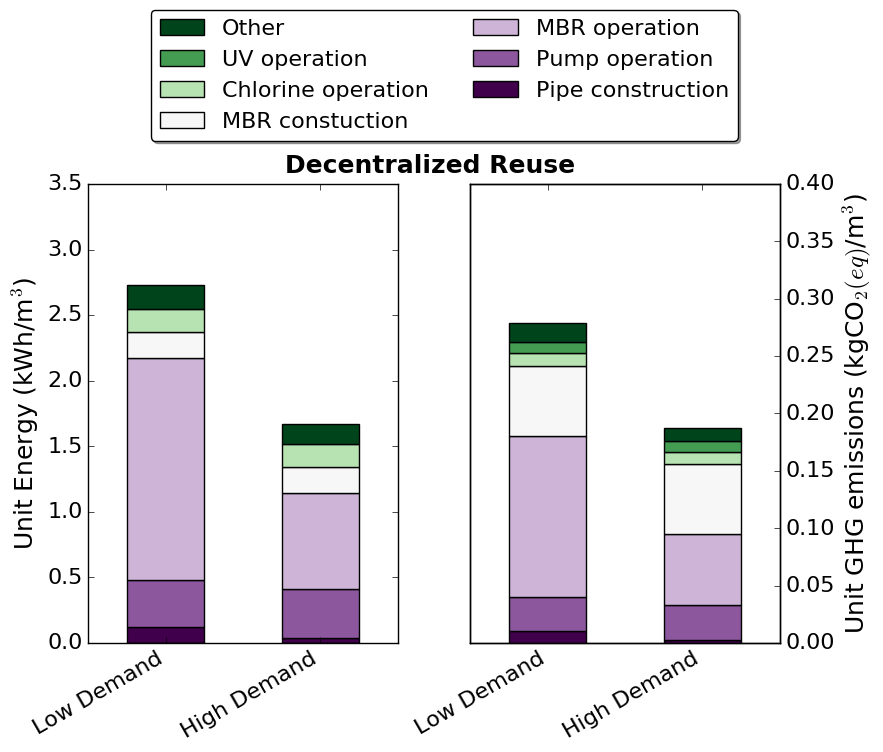

In [99]:
fig = plt.figure(figsize=(9, 6))

ax = fig.add_subplot(121) # Create matplotlib axes
ax2 = fig.add_subplot(122) # Create another axes that shares the same x-axis as ax.
width=0.5
energy_plot_dec3.index=['Low Demand','High Demand']
GHG_plot_dec3.index=['Low Demand','High Demand']

b=GHG_plot_dec3.plot(kind='bar',  stacked=True, colormap='PRGn', width =width ,ax=ax2,legend=False, secondary_y=True,fontsize=16)
a=energy_plot_dec3.plot(kind='bar', stacked=True,colormap='PRGn',width =width , ax=ax,  legend=False,fontsize=16)

a.set_ylabel('Unit Energy (kWh/m$^3$)',fontsize=18)
b.set_ylabel('Unit GHG emissions (kgCO$_2(eq)$/m$^3$)',fontsize=18)


a.set_ylim(0,3.5)
b.set_ylim(0,0.40)
fig.autofmt_xdate()

plt.yticks(fontsize=16)
plt.text(-1.7,0.41,"Decentralized Reuse", fontsize=18, weight="bold")

fig.tight_layout()
handles, labels = b.get_legend_handles_labels()
a.legend(reversed(handles), reversed(labels), loc='lower center', bbox_to_anchor=(1.15, 1.07),ncol=2, fancybox=True, shadow=True,fontsize=16)  # reverse to keep order consistent

# BRANCHED

In [214]:
scenario = 'branched'

In [215]:
total_energy_centralized_m3=pd.read_csv('result_csv/Centralized_total_energy_%s_npr_SF.csv'%scenario)
total_GHG_centralized_m3=pd.read_csv('result_csv/Centralized_total_GHG_%s_npr_SF.csv'%scenario)
process_energy_centralized_m3=pd.read_csv('result_csv/Centralized_process_energy_%s_npr_SF.csv'%scenario)
process_GHG_centralized_m3=pd.read_csv('result_csv/Centralized_process_GHG_%s_npr_SF.csv'%scenario)

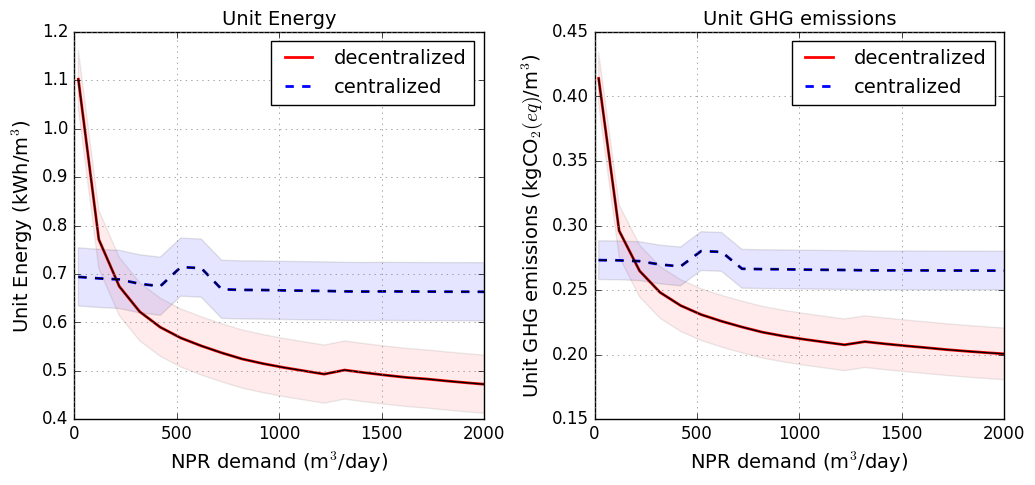

In [216]:
grid_ID_to_show=343

total_energy_decentralized_m3['m3_day']=total_energy_decentralized_m3['People']*0.2
total_energy_centralized_m3['m3_day']=total_energy_centralized_m3['People']*0.2
total_GHG_decentralized_m3['m3_day']=total_GHG_decentralized_m3['People']*0.2
total_GHG_centralized_m3['m3_day']=total_GHG_centralized_m3['People']*0.2

total_energy_decentralized_1=total_energy_decentralized_m3[(total_energy_decentralized_m3['grid_ID']==grid_ID_to_show)]
total_energy_central_1=total_energy_centralized_m3[(total_energy_centralized_m3['grid_ID']==grid_ID_to_show)]
total_GHG_decentralized_1=total_GHG_decentralized_m3[(total_GHG_decentralized_m3['grid_ID']==grid_ID_to_show)]
total_GHG_central_1=total_GHG_centralized_m3[(total_GHG_centralized_m3['grid_ID']==grid_ID_to_show)]

fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(wspace=0.27)
ax = fig.add_subplot(1,2,1)
plt.title('Unit Energy',fontsize=14)
plt.plot(
    total_energy_decentralized_1['m3_day'],
    total_energy_decentralized_1['Total Energy']/3.6,
    '-r',
    linewidth=2.0,
    label = 'decentralized')
plt.plot(total_energy_central_1['m3_day'],total_energy_central_1['Total Energy']/3.6,'--b',linewidth=2.0,label = 'centralized')
legend = plt.legend(frameon = 1, fontsize=14,loc='best')
plt.ylabel('Unit Energy (kWh/m$^3$)',fontsize=14)
plt.xlabel('NPR demand (m$^3$/day)',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,2000)

ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')
x = total_energy_decentralized_1['m3_day']
y = total_energy_decentralized_1['Total Energy']/3.6
error = np.random.uniform(0.06, 0.06, size=y.shape)
y += np.random.uniform(0, 0, size=y.shape)
plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error,facecolor='red',alpha=0.08)
x2 = total_energy_central_1['m3_day']
y2 = total_energy_central_1['Total Energy']/3.6
error2 = np.random.uniform(0.06, 0.06, size=y.shape)
y2 += np.random.uniform(0, 0, size=y.shape)
plt.plot(x2, y2, 'k--')
plt.fill_between(x2, y2-error2, y2+error2,facecolor='blue',alpha=0.1)


ax = fig.add_subplot(1,2,2)
plt.title('Unit GHG emissions',fontsize=14)
plt.plot(total_GHG_decentralized_1['m3_day'],total_GHG_decentralized_1['Total GHG'],'-r',linewidth=2.0,label = 'decentralized')
plt.plot(total_GHG_central_1['m3_day'],total_GHG_central_1['Total GHG'],'--b',linewidth=2.0,label = 'centralized')
legend = plt.legend(frameon = 1, fontsize=14,loc='best')
plt.ylabel('Unit GHG emissions (kgCO$_2(eq)$/m$^3$)',fontsize=14)
plt.xlabel('NPR demand (m$^3$/day)',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,2000)

ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')
x = total_GHG_decentralized_1['m3_day']
y = total_GHG_decentralized_1['Total GHG']
error = np.random.uniform(0.02, 0.02, size=y.shape)
y += np.random.uniform(0, 0, size=y.shape)
plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error,facecolor='red',alpha=0.08)
x2 = total_GHG_central_1['m3_day']
y2 = total_GHG_central_1['Total GHG']
error2 = np.random.uniform(0.015, 0.015, size=y.shape)
y2 += np.random.uniform(0, 0, size=y.shape)
plt.plot(x2, y2, 'k--')
plt.fill_between(x2, y2-error2, y2+error2,facecolor='blue',alpha=0.1)

plt.show()

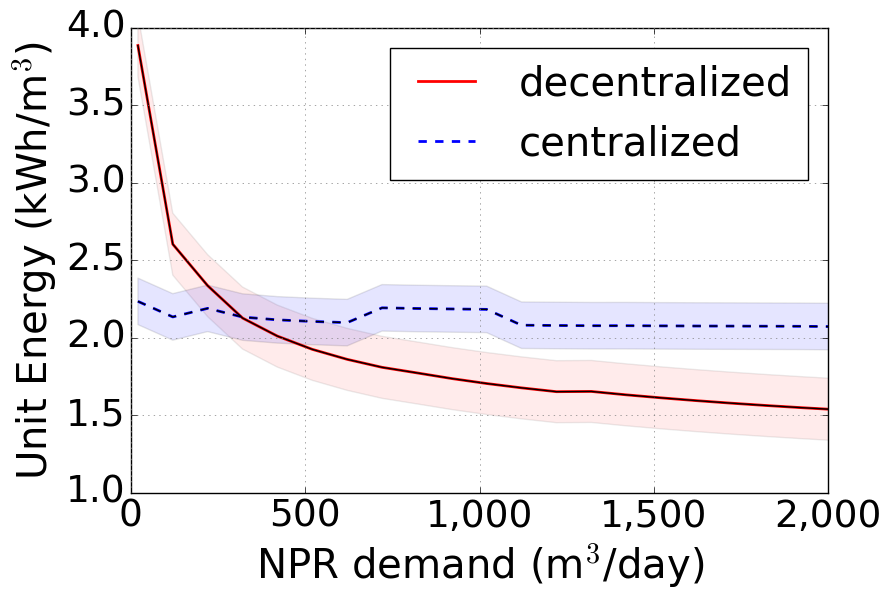

In [217]:
grid_ID_to_show=280

total_energy_decentralized_1=total_energy_decentralized_m3[(total_energy_decentralized_m3['grid_ID']==grid_ID_to_show)]
total_energy_central_1=total_energy_centralized_m3[(total_energy_centralized_m3['grid_ID']==grid_ID_to_show)]
total_GHG_decentralized_1=total_GHG_decentralized_m3[(total_GHG_decentralized_m3['grid_ID']==grid_ID_to_show)]
total_GHG_central_1=total_GHG_centralized_m3[(total_GHG_centralized_m3['grid_ID']==grid_ID_to_show)]

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
plt.plot(
    total_energy_decentralized_1['m3_day'],
    total_energy_decentralized_1['Total Energy'],
    '-r',
    linewidth=2.0,
    label = 'decentralized')
plt.plot(total_energy_central_1['m3_day'],total_energy_central_1['Total Energy'],'--b',linewidth=2.0,label = 'centralized')
legend = plt.legend(frameon = 1, fontsize=29,loc='best')
plt.ylabel('Unit Energy (kWh/m$^3$)',fontsize=29)
plt.xlabel('NPR demand (m$^3$/day)',fontsize=29)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.xlim(0,2000)


ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')
x = total_energy_decentralized_1['m3_day']
y = total_energy_decentralized_1['Total Energy']
error = np.random.uniform(0.2, 0.2, size=y.shape)
y += np.random.uniform(0, 0, size=y.shape)
plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error,facecolor='red',alpha=0.08)
x2 = total_energy_central_1['m3_day']
y2 = total_energy_central_1['Total Energy']
error2 = np.random.uniform(0.15, 0.15, size=y.shape)
y2 += np.random.uniform(0, 0, size=y.shape)
plt.plot(x2, y2, 'k--')
plt.fill_between(x2, y2-error2, y2+error2,facecolor='blue',alpha=0.1)
plt.ylim(1,4)
plt.show()

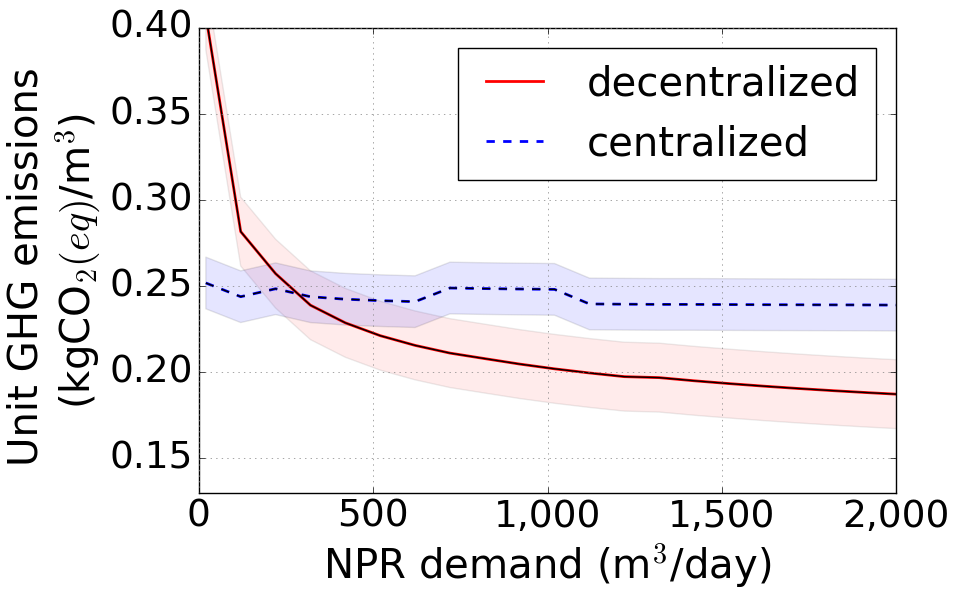

In [218]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
plt.plot(total_GHG_decentralized_1['m3_day'],total_GHG_decentralized_1['Total GHG'],'-r',linewidth=2.0,label = 'decentralized')
plt.plot(total_GHG_central_1['m3_day'],total_GHG_central_1['Total GHG'],'--b',linewidth=2.0,label = 'centralized')
legend = plt.legend(frameon = 1, fontsize=29,loc='best')
plt.ylabel('Unit GHG emissions \n(kgCO$_2(eq)$/m$^3$)',fontsize=29)
plt.xlabel('NPR demand (m$^3$/day)',fontsize=29)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.xlim(0,2000)
plt.ylim(0.13,0.40)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')
x = total_GHG_decentralized_1['m3_day']
y = total_GHG_decentralized_1['Total GHG']
error = np.random.uniform(0.02, 0.02, size=y.shape)
y += np.random.uniform(0, 0, size=y.shape)
plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error,facecolor='red',alpha=0.08)
x2 = total_GHG_central_1['m3_day']
y2 = total_GHG_central_1['Total GHG']
error2 = np.random.uniform(0.015, 0.015, size=y.shape)
y2 += np.random.uniform(0, 0, size=y.shape)
plt.plot(x2, y2, 'k--')
plt.fill_between(x2, y2-error2, y2+error2,facecolor='blue',alpha=0.1)

plt.show()

In [219]:
process_energy_central_m3_plot_low=process_energy_centralized_m3[(process_energy_centralized_m3['grid_ID']==149)]
process_energy_central_m3_plot_high=process_energy_centralized_m3[(process_energy_centralized_m3['grid_ID']==375)]

process_energy_central_m3=process_energy_centralized_m3[['grid_ID','Pipe construction', 'Pipe operation', 
                              'Pump construction', 'Pump operation', 'Tank construction', 
                                    'Collection pumping', 'Secondary treatment operation', 'Secondary treatment construction',
                                    'Tertiary treatment operation', 'RO construction',
                                    'UV operation', 'UV construction', 'Chlorine manufacturing',
                                    'Chlorine tank manufacturing', 'Sludge transport']]


process_GHG_central_m3=process_GHG_centralized_m3[['grid_ID','Pipe construction', 'Pipe operation', 
                              'Pump construction', 'Pump operation', 'Tank construction', 
                                    'Collection pumping', 'Secondary treatment operation', 'Secondary treatment construction',
                                    'Tertiary treatment operation', 'RO construction',
                                    'UV operation', 'UV construction', 'Chlorine manufacturing',
                                    'Chlorine tank manufacturing', 'Sludge transport', 'landfill emissions']]

process_GHG_central_m3_plot_low=process_GHG_centralized_m3[(process_GHG_centralized_m3['grid_ID']==149)]
process_GHG_central_m3_plot_high=process_GHG_centralized_m3[(process_GHG_centralized_m3['grid_ID']==375)]

In [222]:
#only plot 1st and last (low demand - high demand)
energy_plot_central_first_low=process_energy_central_m3_plot_low[1:2]
energy_plot_central_last_low=process_energy_central_m3_plot_low[(-1-1):-1]
energy_plot_central_first_high=process_energy_central_m3_plot_high[1:2]
energy_plot_central_last_high=process_energy_central_m3_plot_high[(-1-1):-1]
energy_plot_central_first_low['Pipe construction'] = 0
energy_plot_central_first_high['Pipe construction'] = energy_plot_central_first_high['Pipe construction']/2
energy_plot_central_last_high['Pump operation'] = energy_plot_central_last_high['Pump operation']*0.8
energy_plot_central_last_low['Pump operation'] = energy_plot_central_last_low['Pump operation']*0.7
frames=[energy_plot_central_first_low,energy_plot_central_last_low,energy_plot_central_first_high,energy_plot_central_last_high]
energy_plot_central=pd.concat(frames)
energy_plot_central=energy_plot_central[['Pipe construction', 'Pipe operation', 
                              'Pump construction', 'Pump operation', 'Tank construction', 
                                    'Secondary treatment operation', 'Secondary treatment construction',
                                    'Tertiary treatment operation', 'RO construction',
                                    'UV operation', 'UV construction', 'Chlorine manufacturing',
                                    'Chlorine tank manufacturing', 'Collection pumping', 'Sludge transport']]
energy_plot_central2=energy_plot_central

GHG_plot_central_first_low=process_GHG_central_m3_plot_low[1:2]
GHG_plot_central_last_low=process_GHG_central_m3_plot_low[(-1-1):-1]
GHG_plot_central_first_high=process_GHG_central_m3_plot_high[1:2]
GHG_plot_central_last_high=process_GHG_central_m3_plot_high[(-1-1):-1]

GHG_plot_central_first_low['Pipe construction'] = 0
GHG_plot_central_first_high['Pipe construction'] = GHG_plot_central_first_high['Pipe construction']/2
GHG_plot_central_last_high['Pump operation'] = GHG_plot_central_last_high['Pump operation']*0.8
GHG_plot_central_last_low['Pump operation'] = GHG_plot_central_last_low['Pump operation']*0.7
frames=[GHG_plot_central_first_low,GHG_plot_central_last_low,GHG_plot_central_first_high,GHG_plot_central_last_high]
GHG_plot_central=pd.concat(frames)
GHG_plot_central=GHG_plot_central[['Pipe construction', 'Pipe operation', 
                              'Pump construction', 'Pump operation', 'Tank construction', 
                                    'Secondary treatment operation', 'Secondary treatment construction',
                                    'Tertiary treatment operation', 'RO construction',
                                    'UV operation', 'UV construction', 'Chlorine manufacturing',
                                    'Chlorine tank manufacturing', 'Sludge transport', 'Collection pumping','landfill emissions']]
GHG_plot_central2=GHG_plot_central

energy_plot_central2['Other']=(energy_plot_central2['Tank construction']+energy_plot_central2['Pipe operation']+
                               energy_plot_central2['Pump construction']+energy_plot_central2['Sludge transport']+
                               energy_plot_central2['RO construction']+energy_plot_central2['UV construction']+
                               energy_plot_central2['Chlorine tank manufacturing']+energy_plot_central2['UV operation'])
energy_plot_central3 = energy_plot_central2
energy_plot_central3 = energy_plot_central3.drop(['Tank construction','Pipe operation','Pump construction',
                                                  'Sludge transport','RO construction','UV construction', 
                                                  'Chlorine tank manufacturing','UV operation'],1)

GHG_plot_central2['Other']=(GHG_plot_central2['Tank construction']+GHG_plot_central2['Pipe operation']+
                               GHG_plot_central2['Pump construction']+GHG_plot_central2['Sludge transport']+
                               GHG_plot_central2['RO construction']+GHG_plot_central2['UV construction']+
                               GHG_plot_central2['landfill emissions']+GHG_plot_central2['Chlorine tank manufacturing']+GHG_plot_central2['UV operation'])
GHG_plot_central3=GHG_plot_central2
GHG_plot_central3 = GHG_plot_central3.drop(['Tank construction','Pipe operation','Pump construction',
                                                  'Sludge transport','RO construction','UV construction', 
                                                  'landfill emissions','Chlorine tank manufacturing','UV operation'],1)

C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

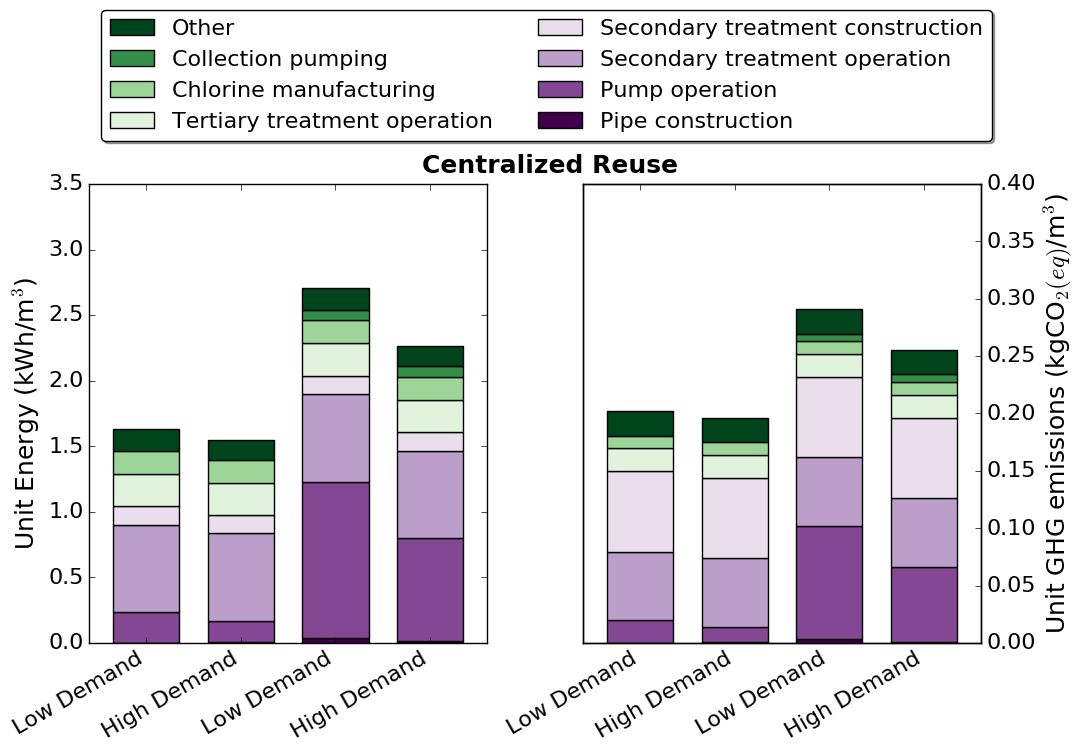

In [223]:
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(121) # Create matplotlib axes
ax2 = fig.add_subplot(122) # Create another axes that shares the same x-axis as ax.
width=0.7
energy_plot_central3.index=['Low Demand','High Demand','Low Demand','High Demand']
GHG_plot_central3.index=['Low Demand','High Demand','Low Demand','High Demand']

a=energy_plot_central3.plot(kind='bar', stacked=True,width =width ,ax=ax,legend=False,colormap='PRGn',fontsize=16)
b=GHG_plot_central3.plot(kind='bar', stacked=True,width =width ,ax=ax2,legend=False,colormap='PRGn',secondary_y=True,fontsize=16)
fig.autofmt_xdate()

a.set_ylabel('Unit Energy (kWh/m$^3$)',fontsize=18)
b.set_ylabel('Unit GHG emissions (kgCO$_2(eq)$/m$^3$)',fontsize=18)
a.set_ylim(0,3.5)
b.set_ylim(0,0.4)
plt.text(-2.3,0.41,"Centralized Reuse", fontsize=18, weight="bold")


plt.yticks(fontsize=16)
fig.tight_layout()
handles, labels = a.get_legend_handles_labels()
a.legend(reversed(handles), reversed(labels), loc='lower center', bbox_to_anchor=(1.15, 1.07),ncol=2, fancybox=True, shadow=True,fontsize=16)  # reverse to keep order consistent

# UNBRANCHED

In [158]:
scenario = 'unbranched'

In [159]:
total_energy_centralized_m3=pd.read_csv('result_csv/Centralized_total_energy_%s_npr_SF.csv'%scenario)
total_GHG_centralized_m3=pd.read_csv('result_csv/Centralized_total_GHG_%s_npr_SF.csv'%scenario)
process_energy_centralized_m3=pd.read_csv('result_csv/Centralized_process_energy_%s_npr_SF.csv'%scenario)
process_GHG_centralized_m3=pd.read_csv('result_csv/Centralized_process_GHG_%s_npr_SF.csv'%scenario)

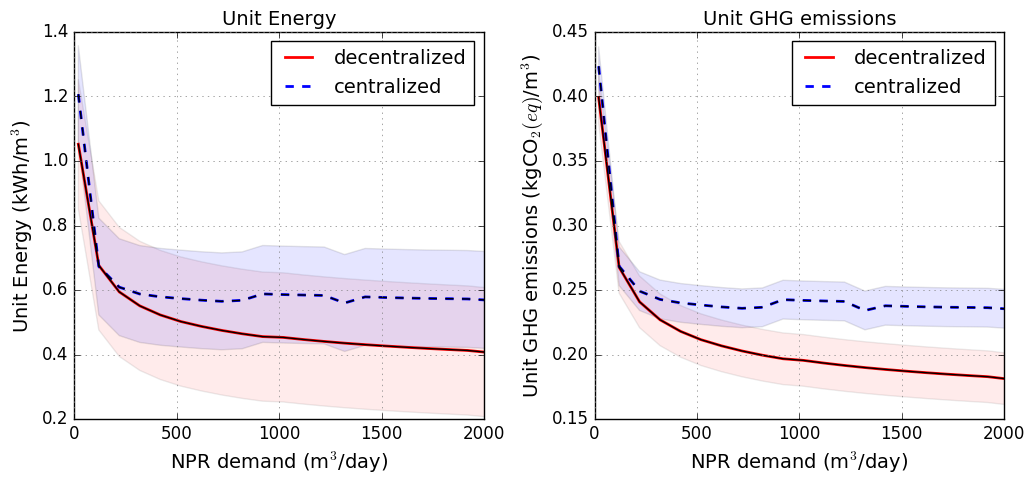

In [160]:
grid_ID_to_show=546

total_energy_decentralized_m3['m3_day']=total_energy_decentralized_m3['People']*0.2
total_energy_centralized_m3['m3_day']=total_energy_centralized_m3['People']*0.2
total_GHG_decentralized_m3['m3_day']=total_GHG_decentralized_m3['People']*0.2
total_GHG_centralized_m3['m3_day']=total_GHG_centralized_m3['People']*0.2

total_energy_decentralized_1=total_energy_decentralized_m3[(total_energy_decentralized_m3['grid_ID']==grid_ID_to_show)]
total_energy_central_1=total_energy_centralized_m3[(total_energy_centralized_m3['grid_ID']==grid_ID_to_show)]
total_GHG_decentralized_1=total_GHG_decentralized_m3[(total_GHG_decentralized_m3['grid_ID']==grid_ID_to_show)]
total_GHG_central_1=total_GHG_centralized_m3[(total_GHG_centralized_m3['grid_ID']==grid_ID_to_show)]

fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(wspace=0.27)
ax = fig.add_subplot(1,2,1)
plt.title('Unit Energy',fontsize=14)
plt.plot(
    total_energy_decentralized_1['m3_day'],
    total_energy_decentralized_1['Total Energy']/3.6,
    '-r',
    linewidth=2.0,
    label = 'decentralized')
plt.plot(total_energy_central_1['m3_day'],total_energy_central_1['Total Energy']/3.6,'--b',linewidth=2.0,label = 'centralized')
legend = plt.legend(frameon = 1, fontsize=14,loc='best')
plt.ylabel('Unit Energy (kWh/m$^3$)',fontsize=14)
plt.xlabel('NPR demand (m$^3$/day)',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,2000)

ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')
x = total_energy_decentralized_1['m3_day']
y = total_energy_decentralized_1['Total Energy']/3.6
error = np.random.uniform(0.2, 0.2, size=y.shape)
y += np.random.uniform(0, 0, size=y.shape)
plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error,facecolor='red',alpha=0.08)
x2 = total_energy_central_1['m3_day']
y2 = total_energy_central_1['Total Energy']/3.6
error2 = np.random.uniform(0.15, 0.15, size=y.shape)
y2 += np.random.uniform(0, 0, size=y.shape)
plt.plot(x2, y2, 'k--')
plt.fill_between(x2, y2-error2, y2+error2,facecolor='blue',alpha=0.1)


ax = fig.add_subplot(1,2,2)
plt.title('Unit GHG emissions',fontsize=14)
plt.plot(total_GHG_decentralized_1['m3_day'],total_GHG_decentralized_1['Total GHG'],'-r',linewidth=2.0,label = 'decentralized')
plt.plot(total_GHG_central_1['m3_day'],total_GHG_central_1['Total GHG'],'--b',linewidth=2.0,label = 'centralized')
legend = plt.legend(frameon = 1, fontsize=14,loc='best')
plt.ylabel('Unit GHG emissions (kgCO$_2(eq)$/m$^3$)',fontsize=14)
plt.xlabel('NPR demand (m$^3$/day)',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,2000)

ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')
x = total_GHG_decentralized_1['m3_day']
y = total_GHG_decentralized_1['Total GHG']
error = np.random.uniform(0.02, 0.02, size=y.shape)
y += np.random.uniform(0, 0, size=y.shape)
plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error,facecolor='red',alpha=0.08)
x2 = total_GHG_central_1['m3_day']
y2 = total_GHG_central_1['Total GHG']
error2 = np.random.uniform(0.015, 0.015, size=y.shape)
y2 += np.random.uniform(0, 0, size=y.shape)
plt.plot(x2, y2, 'k--')
plt.fill_between(x2, y2-error2, y2+error2,facecolor='blue',alpha=0.1)

plt.show()

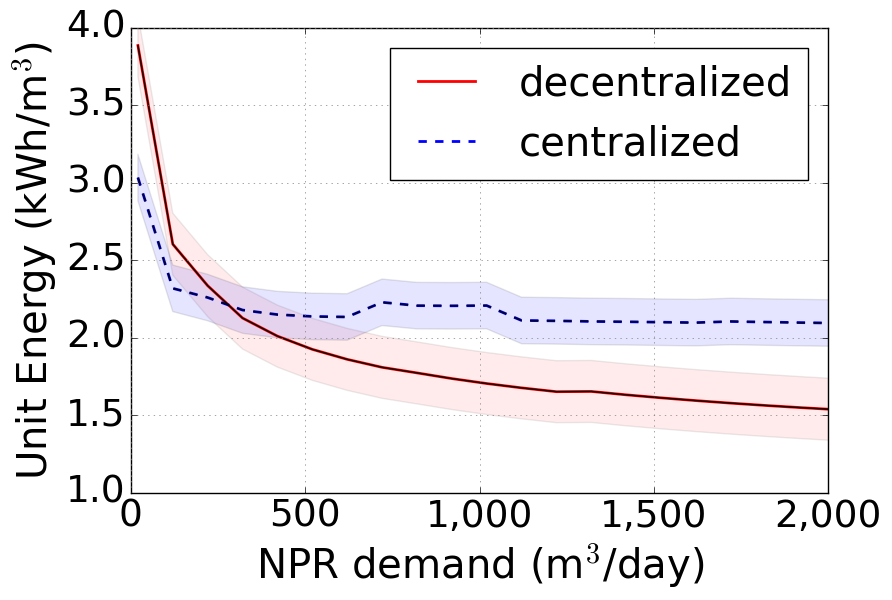

In [161]:
grid_ID_to_show=280

total_energy_decentralized_1=total_energy_decentralized_m3[(total_energy_decentralized_m3['grid_ID']==grid_ID_to_show)]
total_energy_central_1=total_energy_centralized_m3[(total_energy_centralized_m3['grid_ID']==grid_ID_to_show)]
total_GHG_decentralized_1=total_GHG_decentralized_m3[(total_GHG_decentralized_m3['grid_ID']==grid_ID_to_show)]
total_GHG_central_1=total_GHG_centralized_m3[(total_GHG_centralized_m3['grid_ID']==grid_ID_to_show)]

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
plt.plot(
    total_energy_decentralized_1['m3_day'],
    total_energy_decentralized_1['Total Energy'],
    '-r',
    linewidth=2.0,
    label = 'decentralized')
plt.plot(total_energy_central_1['m3_day'],total_energy_central_1['Total Energy'],'--b',linewidth=2.0,label = 'centralized')
legend = plt.legend(frameon = 1, fontsize=29,loc='best')
plt.ylabel('Unit Energy (kWh/m$^3$)',fontsize=29)
plt.xlabel('NPR demand (m$^3$/day)',fontsize=29)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.xlim(0,2000)


ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')
x = total_energy_decentralized_1['m3_day']
y = total_energy_decentralized_1['Total Energy']
error = np.random.uniform(0.2, 0.2, size=y.shape)
y += np.random.uniform(0, 0, size=y.shape)
plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error,facecolor='red',alpha=0.08)
x2 = total_energy_central_1['m3_day']
y2 = total_energy_central_1['Total Energy']
error2 = np.random.uniform(0.15, 0.15, size=y.shape)
y2 += np.random.uniform(0, 0, size=y.shape)
plt.plot(x2, y2, 'k--')
plt.fill_between(x2, y2-error2, y2+error2,facecolor='blue',alpha=0.1)
plt.ylim(1,4)
plt.show()

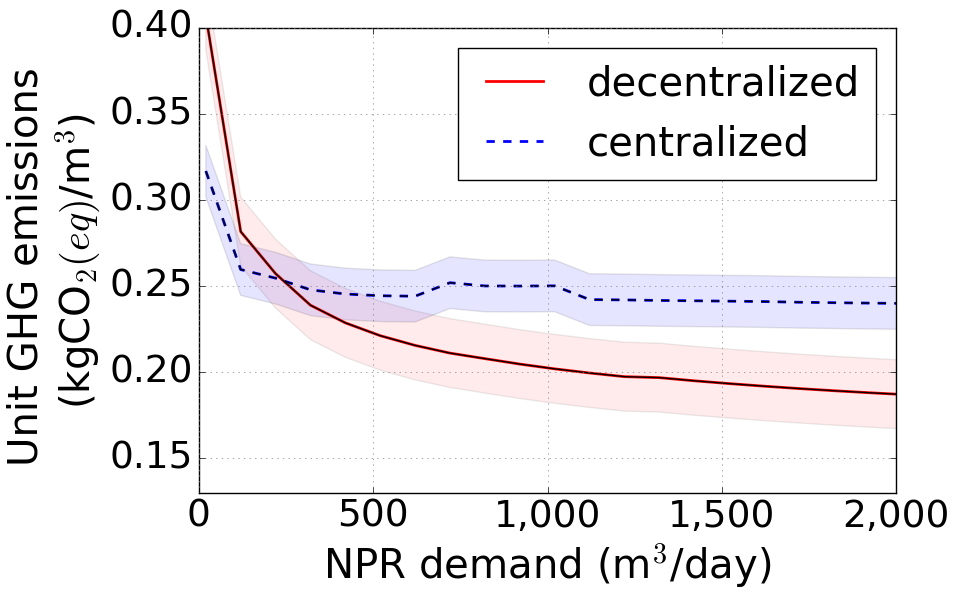

In [162]:
grid_ID_to_show=280

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
plt.plot(total_GHG_decentralized_1['m3_day'],total_GHG_decentralized_1['Total GHG'],'-r',linewidth=2.0,label = 'decentralized')
plt.plot(total_GHG_central_1['m3_day'],total_GHG_central_1['Total GHG'],'--b',linewidth=2.0,label = 'centralized')
legend = plt.legend(frameon = 1, fontsize=29,loc='best')
plt.ylabel('Unit GHG emissions \n(kgCO$_2(eq)$/m$^3$)',fontsize=29)
plt.xlabel('NPR demand (m$^3$/day)',fontsize=29)
plt.xticks(fontsize=27)
plt.yticks(fontsize=27)
plt.xlim(0,2000)
plt.ylim(0.13,0.40)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')
x = total_GHG_decentralized_1['m3_day']
y = total_GHG_decentralized_1['Total GHG']
error = np.random.uniform(0.02, 0.02, size=y.shape)
y += np.random.uniform(0, 0, size=y.shape)
plt.plot(x, y, 'k-')
plt.fill_between(x, y-error, y+error,facecolor='red',alpha=0.08)
x2 = total_GHG_central_1['m3_day']
y2 = total_GHG_central_1['Total GHG']
error2 = np.random.uniform(0.015, 0.015, size=y.shape)
y2 += np.random.uniform(0, 0, size=y.shape)
plt.plot(x2, y2, 'k--')
plt.fill_between(x2, y2-error2, y2+error2,facecolor='blue',alpha=0.1)

plt.show()

In [163]:
process_energy_central_m3_plot_low=process_energy_centralized_m3[(process_energy_centralized_m3['grid_ID']==149)]
process_energy_central_m3_plot_high=process_energy_centralized_m3[(process_energy_centralized_m3['grid_ID']==375)]

process_energy_central_m3=process_energy_centralized_m3[['grid_ID','Pipe construction', 'Pipe operation', 
                              'Pump construction', 'Pump operation', 'Tank construction', 
                                    'Collection pumping', 'Secondary treatment operation', 'Secondary treatment construction',
                                    'Tertiary treatment operation', 'RO construction',
                                    'UV operation', 'UV construction', 'Chlorine manufacturing',
                                    'Chlorine tank manufacturing', 'Sludge transport']]


process_GHG_central_m3=process_GHG_centralized_m3[['grid_ID','Pipe construction', 'Pipe operation', 
                              'Pump construction', 'Pump operation', 'Tank construction', 
                                    'Collection pumping', 'Secondary treatment operation', 'Secondary treatment construction',
                                    'Tertiary treatment operation', 'RO construction',
                                    'UV operation', 'UV construction', 'Chlorine manufacturing',
                                    'Chlorine tank manufacturing', 'Sludge transport', 'landfill emissions']]

process_GHG_central_m3_plot_low=process_GHG_centralized_m3[(process_GHG_centralized_m3['grid_ID']==149)]
process_GHG_central_m3_plot_high=process_GHG_centralized_m3[(process_GHG_centralized_m3['grid_ID']==375)]

In [164]:
#only plot 1st and last (low demand - high demand)
energy_plot_central_first_low=process_energy_central_m3_plot_low[1:2]
energy_plot_central_last_low=process_energy_central_m3_plot_low[(-1-1):-1]
energy_plot_central_first_high=process_energy_central_m3_plot_high[1:2]
energy_plot_central_last_high=process_energy_central_m3_plot_high[(-1-1):-1]

frames=[energy_plot_central_first_low,energy_plot_central_last_low,energy_plot_central_first_high,energy_plot_central_last_high]
energy_plot_central=pd.concat(frames)
energy_plot_central=energy_plot_central[['Pipe construction', 'Pipe operation', 
                              'Pump construction', 'Pump operation', 'Tank construction', 
                                    'Secondary treatment operation', 'Secondary treatment construction',
                                    'Tertiary treatment operation', 'RO construction',
                                    'UV operation', 'UV construction', 'Chlorine manufacturing',
                                    'Chlorine tank manufacturing', 'Collection pumping','Sludge transport']]
energy_plot_central2=energy_plot_central

GHG_plot_central_first_low=process_GHG_central_m3_plot_low[1:2]
GHG_plot_central_last_low=process_GHG_central_m3_plot_low[(-1-1):-1]
GHG_plot_central_first_high=process_GHG_central_m3_plot_high[1:2]
GHG_plot_central_last_high=process_GHG_central_m3_plot_high[(-1-1):-1]

frames=[GHG_plot_central_first_low,GHG_plot_central_last_low,GHG_plot_central_first_high,GHG_plot_central_last_high]
GHG_plot_central=pd.concat(frames)
GHG_plot_central=GHG_plot_central[['Pipe construction', 'Pipe operation', 
                              'Pump construction', 'Pump operation', 'Tank construction', 
                                    'Secondary treatment operation', 'Secondary treatment construction',
                                    'Tertiary treatment operation', 'RO construction',
                                    'UV operation', 'UV construction', 'Chlorine manufacturing',
                                    'Chlorine tank manufacturing', 'Sludge transport','Collection pumping', 'landfill emissions']]
GHG_plot_central2=GHG_plot_central

energy_plot_central2['Other']=(energy_plot_central2['Tank construction']+energy_plot_central2['Pipe operation']+
                               energy_plot_central2['Pump construction']+energy_plot_central2['Sludge transport']+
                               energy_plot_central2['RO construction']+energy_plot_central2['UV construction']+
                               energy_plot_central2['Chlorine tank manufacturing']+energy_plot_central2['UV operation'])
energy_plot_central3 = energy_plot_central2
energy_plot_central3 = energy_plot_central3.drop(['Tank construction','Pipe operation','Pump construction',
                                                  'Sludge transport','RO construction','UV construction', 
                                                  'Chlorine tank manufacturing','UV operation'],1)

GHG_plot_central2['Other']=(GHG_plot_central2['Tank construction']+GHG_plot_central2['Pipe operation']+
                               GHG_plot_central2['Pump construction']+GHG_plot_central2['Sludge transport']+
                               GHG_plot_central2['RO construction']+GHG_plot_central2['UV construction']+
                               GHG_plot_central2['landfill emissions']+GHG_plot_central2['Chlorine tank manufacturing']+
                           GHG_plot_central2['UV operation'])
GHG_plot_central3=GHG_plot_central2
GHG_plot_central3 = GHG_plot_central3.drop(['Tank construction','Pipe operation','Pump construction',
                                                  'Sludge transport','RO construction','UV construction', 
                                                  'landfill emissions','Chlorine tank manufacturing', 'UV operation'],1)

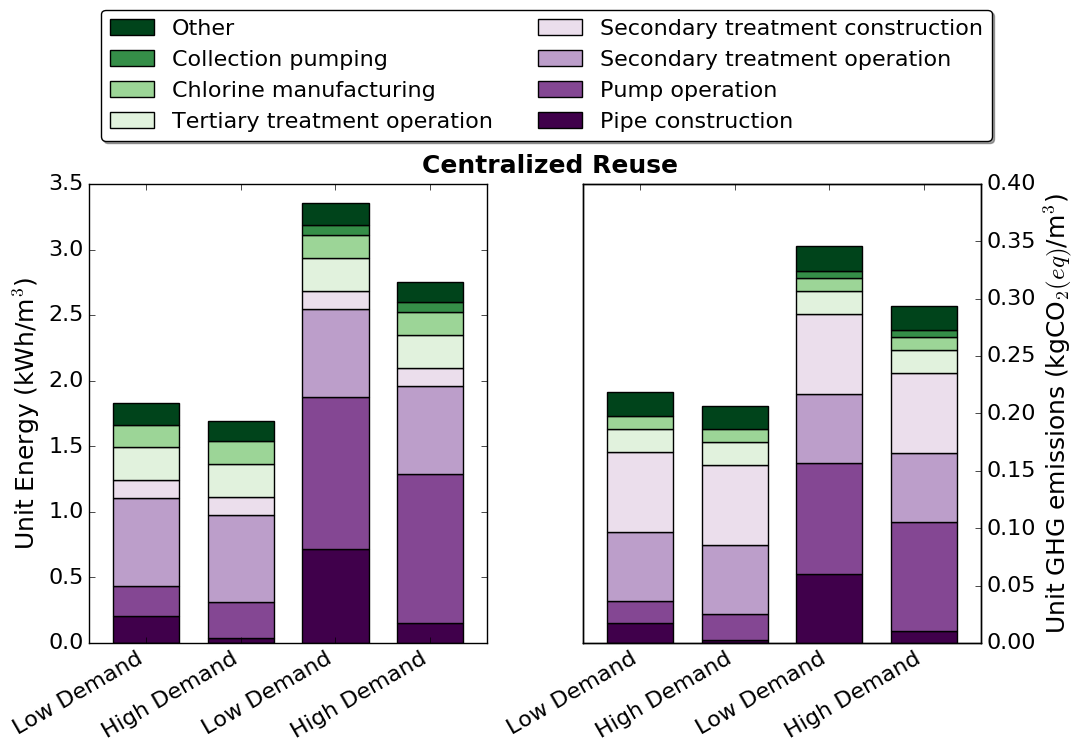

In [165]:
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(121) # Create matplotlib axes
ax2 = fig.add_subplot(122) # Create another axes that shares the same x-axis as ax.
width=0.7
energy_plot_central3.index=['Low Demand','High Demand','Low Demand','High Demand']
GHG_plot_central3.index=['Low Demand','High Demand','Low Demand','High Demand']

a=energy_plot_central3.plot(kind='bar', stacked=True,width =width ,ax=ax,legend=False,colormap='PRGn',fontsize=16)
b=GHG_plot_central3.plot(kind='bar', stacked=True,width =width ,ax=ax2,legend=False,colormap='PRGn',secondary_y=True,fontsize=16)
#ax.set_xticklabels(energy_plot_central3.index, rotation=0)
fig.autofmt_xdate()

a.set_ylabel('Unit Energy (kWh/m$^3$)',fontsize=18)
b.set_ylabel('Unit GHG emissions (kgCO$_2(eq)$/m$^3$)',fontsize=18)

plt.text(-2.3,0.41,"Centralized Reuse", fontsize=18, weight="bold")
a.set_ylim(0,3.5)
b.set_ylim(0,0.40)

plt.yticks(fontsize=16)
#b.legend(loc='lower center', bbox_to_anchor=(-0.1, 1.05),          ncol=2, fancybox=True, shadow=True,fontsize=16)
fig.tight_layout()
handles, labels = b.get_legend_handles_labels()
a.legend(reversed(handles), reversed(labels), loc='lower center', bbox_to_anchor=(1.15, 1.07),ncol=2, fancybox=True, shadow=True,fontsize=16)  # reverse to keep order consistent